In [12]:
#import thư viện
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#tải data
path='https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv'

data=pd.read_csv(path,header=None)
data

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.shape

(768, 9)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       768 non-null    int64  
 1   1       768 non-null    int64  
 2   2       768 non-null    int64  
 3   3       768 non-null    int64  
 4   4       768 non-null    int64  
 5   5       768 non-null    float64
 6   6       768 non-null    float64
 7   7       768 non-null    int64  
 8   8       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Kết quả cho thấy dataset trên không bị missing dữ liệu

In [20]:
# thống kê dataset
data.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


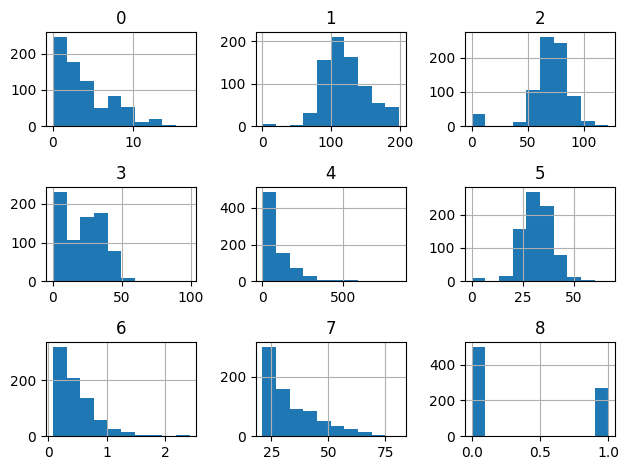

In [8]:
data.hist()
#tạo khoảng cách giữa các đồ thị
plt.tight_layout()
plt.show()


In [26]:
from numpy import mean,std
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
data2=data.values
#Cắt dữ liệu
x,y = data2[:, :-1], data2[:, -1]
#covert data
x=x.astype('float')
y=LabelEncoder().fit_transform(y.astype('str'))
# y2=pd.DataFrame(y)
# y2.info()

In [25]:
#model
model=LogisticRegression(solver='liblinear')
#Tạo một cross-validation strategy
#(chiến lược kiểm tra chéo) bằng cách sử dụng RepeatedStratifiedKFold.
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

m_scores = cross_val_score(model,x,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('Accuracy: %.3f (%.3f)'%(mean(m_scores) , std(m_scores)))


Accuracy: 0.768 (0.040)


In [27]:
from sklearn.pipeline import Pipeline

model=LogisticRegression(solver='liblinear')
scaler = MinMaxScaler()
pipeline = Pipeline([('s',scaler),('m',model)])
#Tạo một cross-validation strategy
#(chiến lược kiểm tra chéo) bằng cách sử dụng RepeatedStratifiedKFold.
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

m_scores = cross_val_score(pipeline,x,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('Accuracy: %.3f (%.3f)'%(mean(m_scores) , std(m_scores)))

Accuracy: 0.764 (0.045)


In [28]:
from sklearn.preprocessing import StandardScaler
model=LogisticRegression(solver='liblinear')
scaler = StandardScaler()
pipeline = Pipeline([('s',scaler),('m',model)])
#Tạo một cross-validation strategy
#(chiến lược kiểm tra chéo) bằng cách sử dụng RepeatedStratifiedKFold.
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

m_scores = cross_val_score(pipeline,x,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('Accuracy: %.3f (%.3f)'%(mean(m_scores) , std(m_scores)))

Accuracy: 0.772 (0.043)


In [29]:
from sklearn.compose import ColumnTransformer

norm_ix = [1,2,5]
exp_ix = [0,3,4,6,7]
t = [('e', MinMaxScaler(),exp_ix)]
selective = ColumnTransformer(transformers=t , remainder='passthrough')
#model
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline([('s',selective),('m',model)])

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

m_scores = cross_val_score(pipeline,x,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('Accuracy: %.3f (%.3f)'%(mean(m_scores) , std(m_scores)))


Accuracy: 0.770 (0.043)


In [31]:

norm_ix = [1,2,5]
exp_ix = [0,3,4,6,7]
t = [('e', MinMaxScaler(),exp_ix),('n',StandardScaler(),norm_ix)]
selective = ColumnTransformer(transformers=t)
#model
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline([('s',selective),('m',model)])

cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)

m_scores = cross_val_score(pipeline,x,y,scoring='accuracy',cv=cv,n_jobs=-1)

print('Accuracy: %.3f (%.3f)'%(mean(m_scores) , std(m_scores)))


Accuracy: 0.772 (0.040)
